## Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

## Read Dataset

In [3]:
# Read csv from path
df = pd.read_excel('Bookings.xlsx')
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


## Sanity Check of Data

In [4]:
# Checking shape
df.shape

(103024, 20)

In [5]:
# Checking detail info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [6]:
# Checking null values
df.isnull().sum()

# Date, Time, Booking_id, Booking_status, customer_id, vehicle_type, pickup_location, drop_location should not be null

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
dtype: int64

In [7]:
# Checking duplicate values
df.duplicated().sum()

0

In [8]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Time
00:53:00    101
22:12:00     97
01:13:00     96
18:20:00     95
08:31:00     95
           ... 
01:00:00     50
23:28:00     49
00:02:00     48
04:39:00     48
02:22:00     42
Name: count, Length: 1440, dtype: int64
******************************
Booking_ID
CNR7153255142    1
CNR3132290107    1
CNR8932160336    1
CNR9179360017    1
CNR5601846474    1
                ..
CNR7587717418    1
CNR1238312945    1
CNR6917109437    1
CNR1410343839    1
CNR9770709721    1
Name: count, Length: 103024, dtype: int64
******************************
Booking_Status
Success                 63967
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64
******************************
Customer_ID
CID954071    5
CID329193    4
CID543568    4
CID199017    4
CID779459    4
            ..
CID776973    1
CID923678    1
CID986113    1
CID414821    1
CID684944    1
Name: count, Length: 94544, dtype: int64
******************************
Vehicle_Type
P

## EDA-Exploratory Data Analysis

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,103024,2024-07-16 11:31:38.879678720,2024-07-01 00:00:00,2024-07-08 18:41:00,2024-07-16 11:23:00,2024-07-24 05:18:00,2024-07-31 23:58:00,NaN
V_TAT,63967.0,170.876952,35.0,98.0,168.0,238.0,308.0,80.80364
C_TAT,63967.0,84.873372,25.0,55.0,85.0,115.0,145.0,36.0051
Booking_Value,103024.0,548.751883,100.0,242.0,386.0,621.0,2999.0,536.541221
Ride_Distance,103024.0,14.189927,0.0,0.0,8.0,26.0,49.0,15.77627
Driver_Ratings,63967.0,3.997457,3.0,3.5,4.0,4.5,5.0,0.576834
Customer_Rating,63967.0,3.998313,3.0,3.5,4.0,4.5,5.0,0.578957


In [10]:
df.describe(include="object")

,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Payment_Method,Vehicle Images
count,103024,103024,103024,103024,103024,103024,103024,10499,18434,63967,3926,63967,103024
unique,1440,103024,4,94544,7,50,50,5,4,2,3,4,7
top,00:53:00,CNR7153255142,Success,CID954071,Prime Sedan,Banashankari,Peenya,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,Cash,https://cdn-icons-png.flaticon.com/128/14183/1...
freq,101,1,63967,5,14877,2201,2159,3175,6542,60041,1601,35022,14877


In [11]:
df.select_dtypes(include = "number").columns

Index(['V_TAT', 'C_TAT', 'Booking_Value', 'Ride_Distance', 'Driver_Ratings',
       'Customer_Rating'],
      dtype='object')

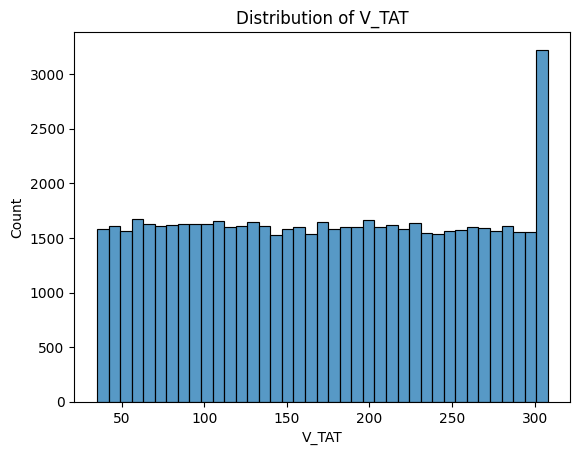

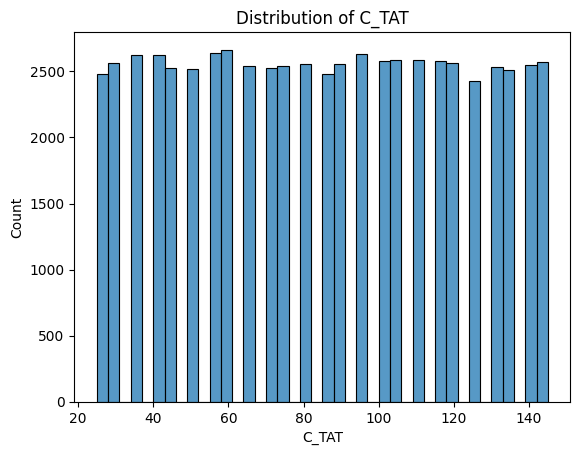

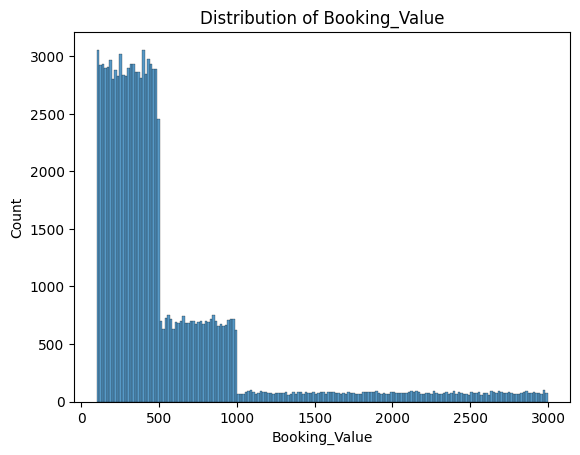

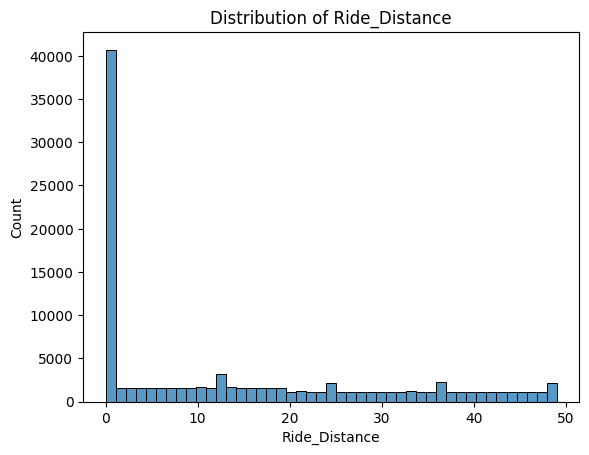

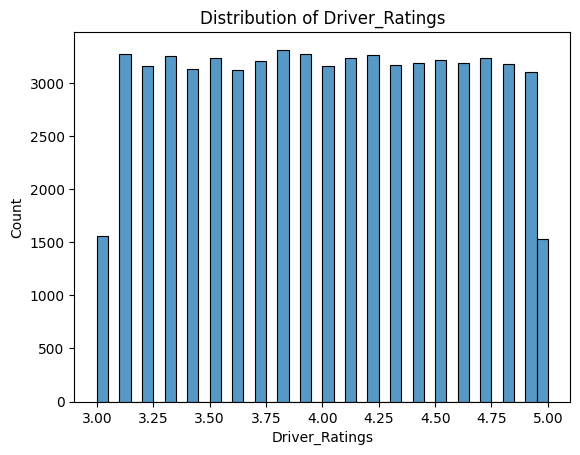

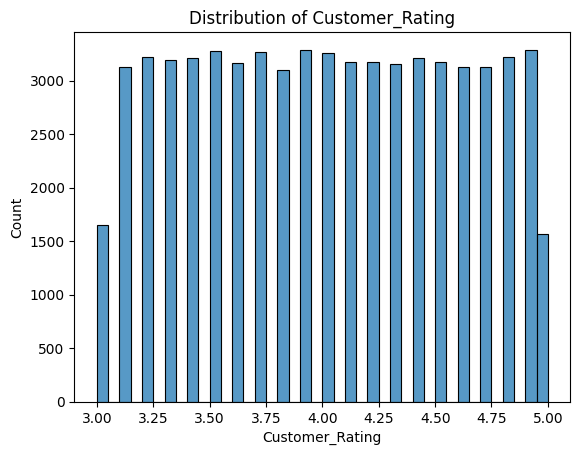

In [12]:
# Histogram to understand distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data= df, x= i)
    plt.title(f"Distribution of {i}")
    plt.show()

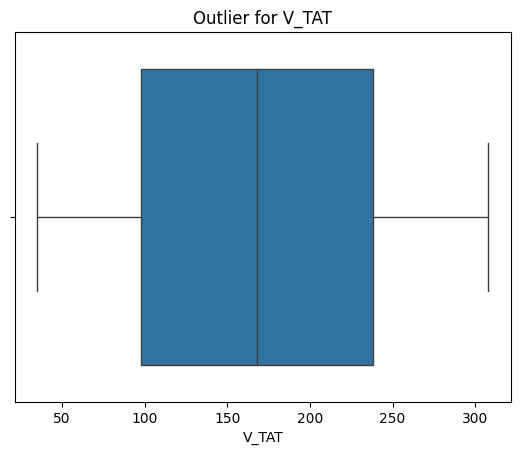

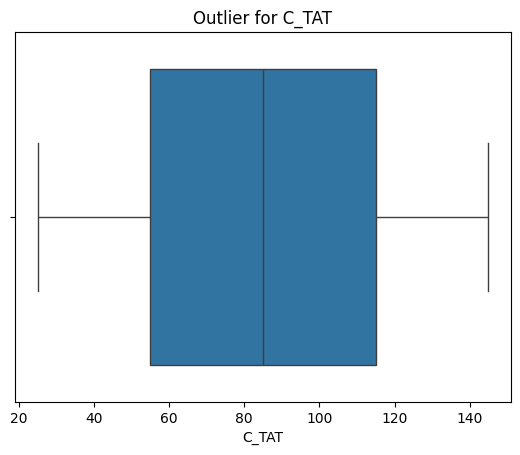

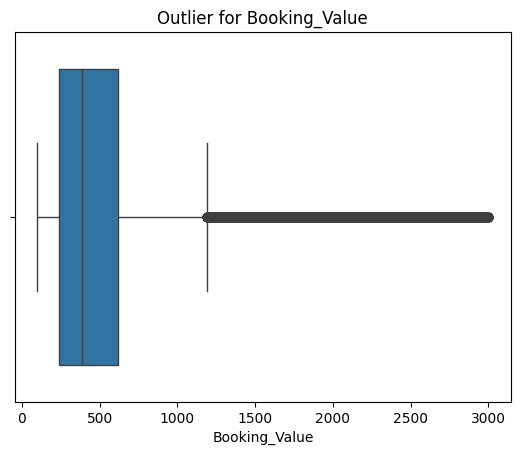

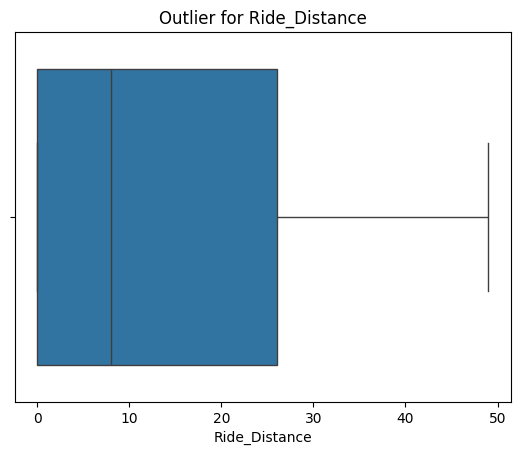

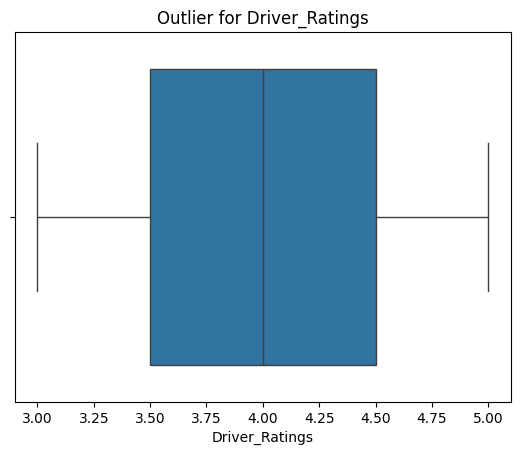

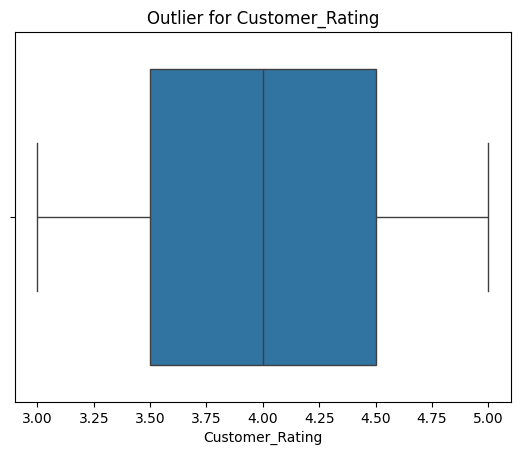

In [13]:
# Boxplot to understand outlier
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data= df, x= i)
    plt.title(f"Outlier for {i}")
    plt.show()

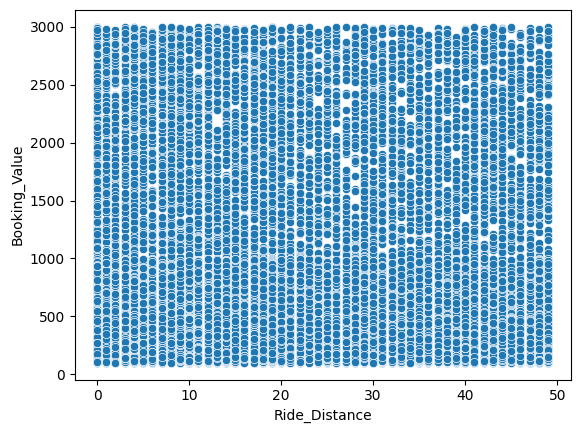

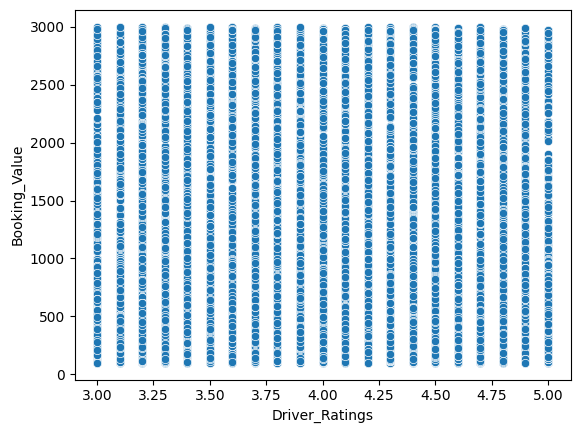

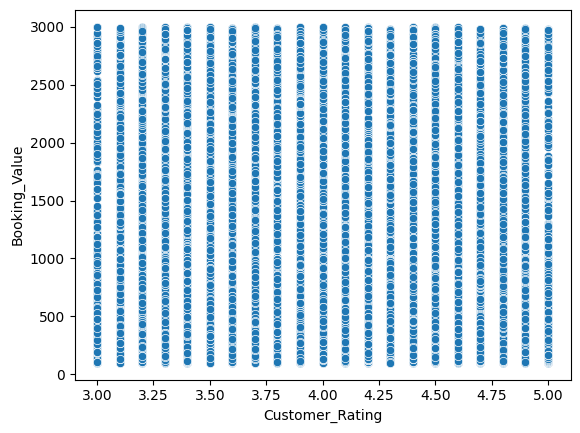

In [14]:
# Scatter plot to understand relationship
for i in ["Ride_Distance", "Driver_Ratings", "Customer_Rating"]:
    sns.scatterplot(data= df, x= i, y= "Booking_Value")
    plt.show()

<Axes: >

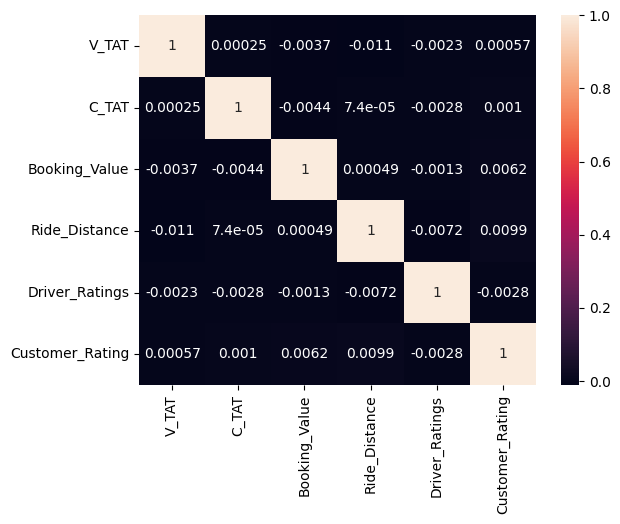

In [15]:
# Correlation with heatmap to interpret the relationship and multicolliniarity
sns.heatmap(df.select_dtypes(include= "number").corr(), annot= True)

## Data Treatment

In [23]:
# Replace NA values based on column data type
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(0)  # Replace NA in numeric columns with 0
    elif pd.api.types.is_string_dtype(df[col]):
        df[col].fillna('null')  # Replace NA in text columns with 'null'

In [24]:
# Export to CSV
df.to_csv('Bookings.csv', index=False)